In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('../datasets/Flights_2021/final_dataset-add.csv')
df.shape

(538040, 37)

In [3]:
df['CRSDepTime']

0         1625
1         1540
2         1619
3         1552
4         1625
          ... 
538035     520
538036     655
538037     500
538038     525
538039     515
Name: CRSDepTime, Length: 538040, dtype: int64

In [4]:
df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'Marketing_Airline_Network', 'Operating_Airline ',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'TaxiIn', 'CRSArrTime',
       'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'DistanceGroup',
       'CombinedDateTime', 'ScaledCRSDepTime', 'temperature_2m',
       'relative_humidity_2m', 'dew_point_2m', 'precipitation', 'rain',
       'snowfall', 'weather_code', 'surface_pressure', 'cloud_cover',
       'wind_speed_10m', 'wind_direction_10m', 'wind_direction_100m'],
      dtype='object')

In [5]:
df.drop(columns=["FlightDate","OriginAirportID","DestAirportID","CRSArrTime","Unnamed: 0","CombinedDateTime","ScaledCRSDepTime"],
        inplace=True)

In [6]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operating_Airline ', 'Origin', 'Dest',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDel15', 'TaxiIn',
       'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'DistanceGroup',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'precipitation', 'rain', 'snowfall', 'weather_code', 'surface_pressure',
       'cloud_cover', 'wind_speed_10m', 'wind_direction_10m',
       'wind_direction_100m'],
      dtype='object')

In [7]:
df = df[df['ArrDel15'].notna()]

In [8]:
for col in df.columns:
    if df[col].isna().sum()>0:
        print(col)

# Replace LabelEncoder with inbuilt Encoding

In [238]:
airportLabel = [
    {"id": 0, "code": "BWI"},
    {"id": 1, "code": "CLT"},
    {"id": 2, "code": "DEN"},
    {"id": 3, "code": "DFW"},
    {"id": 4, "code": "DTW"},
    {"id": 5, "code": "IAH"},
    {"id": 6, "code": "LAX"},
    {"id": 7, "code": "MDW"},
    {"id": 8, "code": "ORD"},
    {"id": 9, "code": "PHL"},
    {"id": 10, "code": "PHX"},
    {"id": 11, "code": "SEA"},
    {"id": 12, "code": "SFO"},
    {"id": 13, "code": "SLC"}
]

airport_mapping = {airport['code']: airport['id'] for airport in airportLabel}


# Replace Origin and Dest columns with corresponding ids
df['Origin'] = df['Origin'].map(airport_mapping)
df['Dest'] = df['Dest'].map(airport_mapping)


# labelEncoder = LabelEncoder()
# df["Origin"] = labelEncoder.fit_transform(df["Origin"])
# df["Dest"] = labelEncoder.fit_transform(df["Dest"])



In [239]:
df['Origin']

0          3
1          3
2          3
3          3
4          3
          ..
538035     5
538036     9
538037    12
538038    12
538039    10
Name: Origin, Length: 536982, dtype: int64

In [240]:
X = df[["Origin", "Dest", "CRSDepTime", "DepDel15", 'temperature_2m', 'dew_point_2m',
       'precipitation','cloud_cover','wind_direction_100m']]
y =  np.array(df.loc[:, df.columns == "ArrDel15"]["ArrDel15"])

model = RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=42, n_jobs=-1)

model.fit(X, y)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=42)

In [241]:
importances = model.feature_importances_
# importances

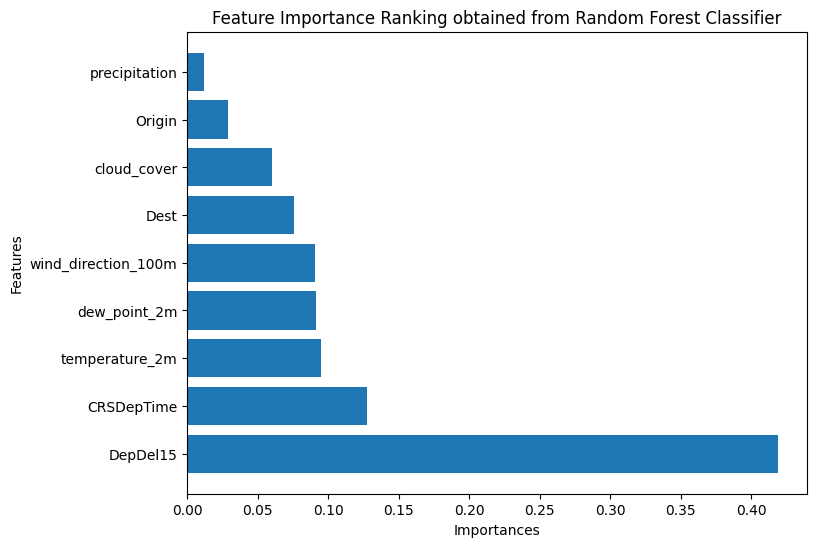

In [242]:
importances = pd.DataFrame({
    "Feature": list(X.columns),
    "Importance": model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
importances = importances.set_index("Feature")
importances
plt.figure(figsize=(8, 6))
plt.barh(importances.index, importances.Importance)
plt.title("Feature Importance Ranking obtained from Random Forest Classifier", fontsize=12)
plt.xlabel("Importances")
plt.ylabel("Features")
plt.show()

In [243]:
# labelEncoder = LabelEncoder()
# df["Origin"] = labelEncoder.fit_transform(df["Origin"])
# df["Dest"] = labelEncoder.fit_transform(df["Dest"])
# df[["Origin", "Dest"]]

In [244]:
print(f"\nDataset shape: {df.shape}")
X_train, X_test, y_train, y_test = train_test_split= train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X train shape: {X_train.shape} | Y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape} | Y test shape: {y_test.shape}")


Dataset shape: (536982, 30)
X train shape: (375887, 9) | Y train shape: (375887,)
X test shape: (161095, 9) | Y test shape: (161095,)


In [245]:
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression with class imbalance

===Classification report===
Report:                precision    recall  f1-score   support

         0.0       0.95      0.94      0.95    133205
         1.0       0.74      0.77      0.75     27890

    accuracy                           0.91    161095
   macro avg       0.85      0.86      0.85    161095
weighted avg       0.91      0.91      0.91    161095



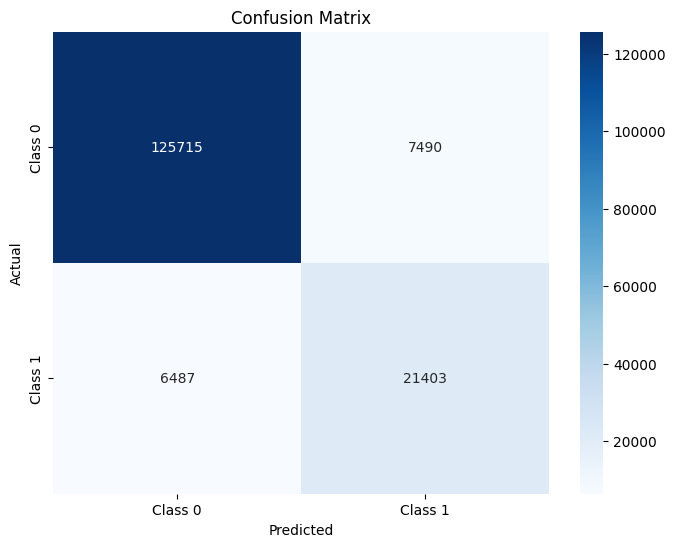

In [246]:
param_grid = {
    'C': [0.01, 0.1],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga']  
}
logreg_model = LogisticRegression(max_iter=100)

grid_search = GridSearchCV(logreg_model, param_grid, cv=5)

grid_search.fit(X_train, y_train)
# save the model
filename = '../models/classification-logistic-c-imbalance.pkl' 
pickle.dump(grid_search, open(filename,'wb'))
best_logreg_model = grid_search.best_estimator_
yhat = best_logreg_model.predict(X_test)

print("===Classification report===")
print("Report: ", classification_report(y_test, yhat))


cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Assure the class is balanced

In [247]:
smote = SMOTE(random_state=42)
features_train, labels_train = smote.fit_resample(X_train, y_train)

In [248]:
features_train.shape

(620410, 9)

In [249]:
labels_train.shape

(620410,)

In [250]:
from collections import Counter
element_counts = Counter(labels_train)

for element, count in element_counts.items():
    print(f"Element {element} occurs {count} times.")

Element 0.0 occurs 310205 times.
Element 1.0 occurs 310205 times.


# LogisticRegression with class balanced SMOTE generated data

In [251]:
param_grid = {
    'C': [0.01, 0.1],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga']  
}
logreg_model = LogisticRegression(max_iter=100)



grid_search = GridSearchCV(logreg_model, param_grid, cv=5)
grid_search.fit(features_train, labels_train)

# save the model
filename = '../model/classification-logistic-c-balance.pkl' 
pickle.dump(logreg_model, open(filename,'wb'))

best_logreg_model = grid_search.best_estimator_
yhat = best_logreg_model.predict(X_test)


print("===Classification report===")
print("Report: ", classification_report(y_test, yhat))


cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# RandomForestClassifier with class balanced SMOTE generated data

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 75],
    'max_depth': [None, 10, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the Random Forest model
rf_model = RandomForestClassifier()



# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(features_train, labels_train)

filename = '../model/classification-rf-c-balance.pkl' 
pickle.dump(rf_model, open(filename,'wb'))

# Get the best Random Forest model from the grid search
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test set
yhat_rf = best_rf_model.predict(X_test)

# Display classification report
print("=== Classification report ===")
print("Report: ", classification_report(y_test, yhat_rf))

cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
del rf_model
del yhat_rf
